In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

In [3]:
# Set some nice plotting styles
sns.set_theme(style="whitegrid")

# --- 1. Load the Data ---
# Use the exact path where you saved your file
file_path = '/home/markus_frey/Github/modalities/tutorials/2b_fineweb/stuff/logits_comparison.npz'

with np.load(file_path) as data:
    modalities_logits = data['modalities_logits']
    llama_logits = data['llama_logits']

In [9]:
# --- 2. Calculate Differences ---
# We'll work with the absolute difference for visualization
absolute_diff = np.abs(modalities_logits - llama_logits)

print(f"Logits shape: {modalities_logits.shape}")
print(f"Max absolute difference: {absolute_diff.max():.6f}")
print(f"Mean absolute difference: {absolute_diff.mean():.6f}")
print(f"Mean of Llama logits: {np.mean(llama_logits):.6f}")
print(f"Mean of Modalities logits: {np.mean(modalities_logits):.6f}")

Logits shape: (100, 251008)
Max absolute difference: 0.125000
Mean absolute difference: 0.014310
Mean of Llama logits: -2.213585
Mean of Modalities logits: -2.210029


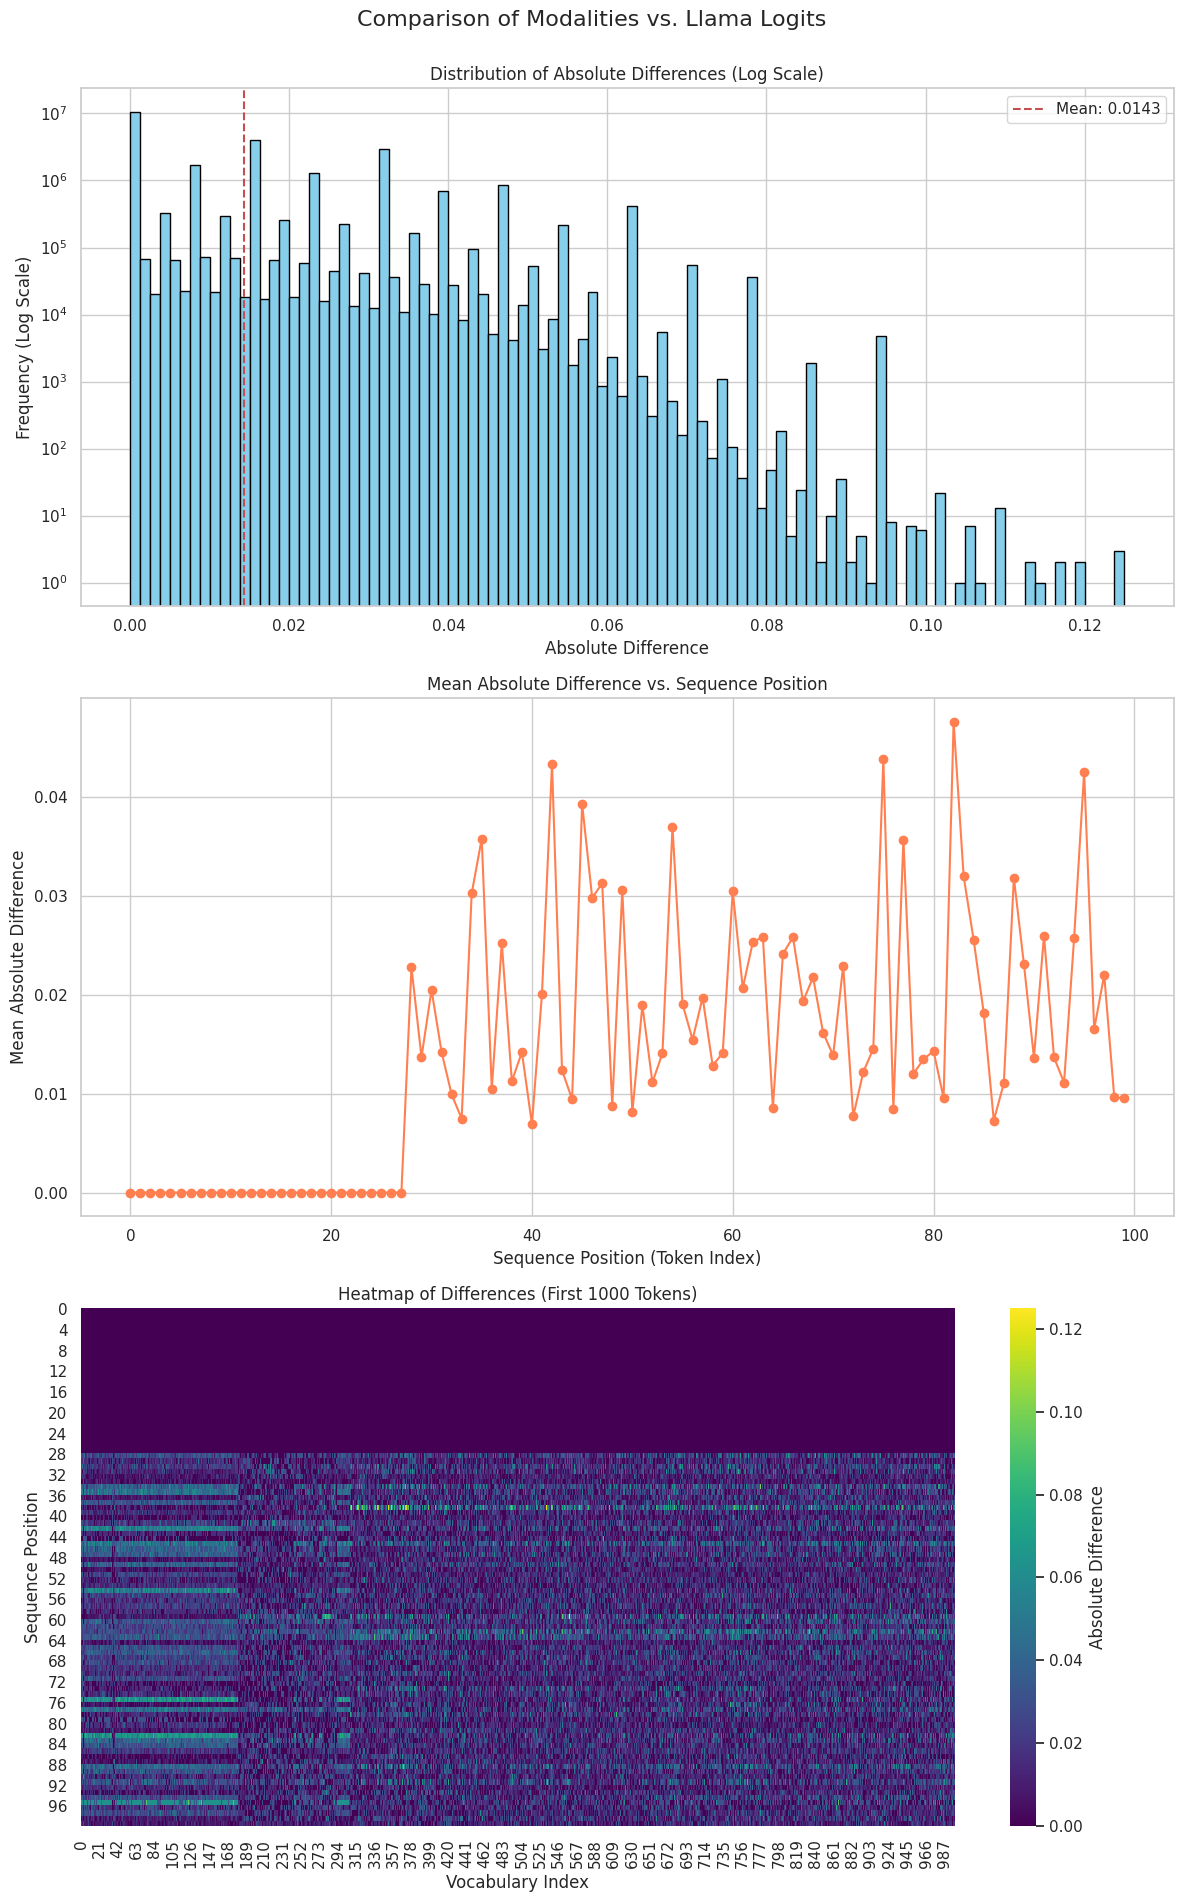

In [6]:
# Create a figure to hold our subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
fig.suptitle('Comparison of Modalities vs. Llama Logits', fontsize=16, y=0.95)


# Plot 1: Histogram of Absolute Differences
ax1 = axes[0]
ax1.hist(absolute_diff.flatten(), bins=100, log=True, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Absolute Differences (Log Scale)')
ax1.set_xlabel('Absolute Difference')
ax1.set_ylabel('Frequency (Log Scale)')
ax1.axvline(absolute_diff.mean(), color='r', linestyle='--', label=f'Mean: {absolute_diff.mean():.4f}')
ax1.legend()


# Plot 2: Mean Difference Across Sequence Length
ax2 = axes[1]
mean_diff_per_position = absolute_diff.mean(axis=1) # axis=1 is the vocabulary dimension
ax2.plot(mean_diff_per_position, marker='o', linestyle='-', color='coral')
ax2.set_title('Mean Absolute Difference vs. Sequence Position')
ax2.set_xlabel('Sequence Position (Token Index)')
ax2.set_ylabel('Mean Absolute Difference')


# Plot 3: Heatmap of a Slice of the Differences
ax3 = axes[2]
# We can't plot 100x200k, so we'll take a slice, e.g., the first 500 vocabulary tokens
slice_vocab_size = min(1000, absolute_diff.shape[1])
diff_slice = absolute_diff[:, :slice_vocab_size]

sns.heatmap(diff_slice, ax=ax3, cmap='viridis', cbar_kws={'label': 'Absolute Difference'})
ax3.set_title(f'Heatmap of Differences (First {slice_vocab_size} Tokens)')
ax3.set_xlabel('Vocabulary Index')
ax3.set_ylabel('Sequence Position')


# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()


In [11]:
modalities_flat = modalities_logits.flatten()
llama_flat = llama_logits.flatten()

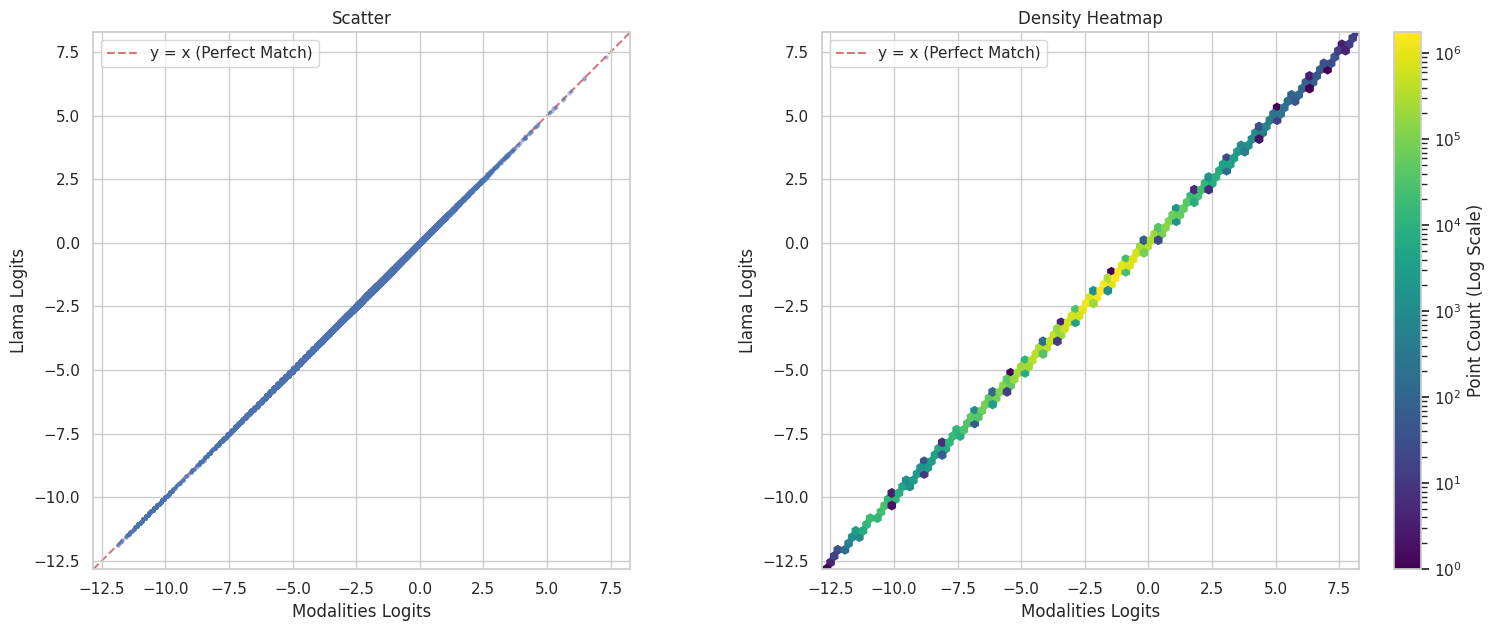

In [18]:
# --- 2. Create the Plots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('', fontsize=16, y=0.98)


# Plot 1: Scatter Plot of a Random Sample
ax1 = axes[0]
# We have too many points to plot directly, so we'll take a random sample
num_samples = 100000
indices = np.random.choice(len(modalities_flat), num_samples, replace=False)
ax1.scatter(modalities_flat[indices], llama_flat[indices], alpha=0.3, s=5)

# Add a y=x line for reference (perfect correlation)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),
    np.max([ax1.get_xlim(), ax1.get_ylim()]),
]
ax1.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='y = x (Perfect Match)')
ax1.set_xlim(lims)
ax1.set_ylim(lims)

ax1.set_title(f'Scatter')
ax1.set_xlabel('Modalities Logits')
ax1.set_ylabel('Llama Logits')
ax1.grid(True)
ax1.legend()
ax1.set_aspect('equal', 'box')


# Plot 2: 2D Histogram (Hexbin Plot) of All Data
ax2 = axes[1]
# A hexbin plot is great for visualizing the density of a large number of points
hb = ax2.hexbin(
    modalities_flat,
    llama_flat,
    gridsize=100,      # More bins for higher resolution
    cmap='viridis',    # A nice colormap
    norm=LogNorm()     # Use log scale for color to see outliers
)

# Add the y=x reference line
ax2.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='y = x (Perfect Match)')
ax2.set_xlim(lims)
ax2.set_ylim(lims)

# Add a color bar
cb = fig.colorbar(hb, ax=ax2)
cb.set_label('Point Count (Log Scale)')

ax2.set_title('Density Heatmap')
ax2.set_xlabel('Modalities Logits')
ax2.set_ylabel('Llama Logits')
ax2.grid(True)
ax2.legend()
ax2.set_aspect('equal', 'box')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()